In [38]:
import pandas as pd
import random
import numpy as np

In [130]:
import matplotlib
from matplotlib import pyplot as plt

In [132]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [105]:
def getRandomNumberList(size, spread=30):
    return np.random.randint(spread, size=size) + (100-spread)

In [239]:
student_count = 30
student_ids = range(1, student_count+1)

maths_score = getRandomNumberList(student_count)
physics_score = getRandomNumberList(student_count, 40)
bio_score = getRandomNumberList(student_count, 10)
chem_score = getRandomNumberList(student_count, 20)

df_students = pd.DataFrame(
    {
        "Student_Id" : student_ids,
        "Mathematics" : maths_score,
        "Physics" : physics_score,
        "Biology" : bio_score,
        "Chemistry" : chem_score
    },
    columns=["Student_Id", "Mathematics", "Physics", "Biology", "Chemistry"])

In [240]:
df_students.head()

,Student_Id,Mathematics,Physics,Biology,Chemistry
0,1,85,93,98,80
1,2,99,89,94,82
2,3,76,79,91,89
3,4,87,79,95,98
4,5,98,67,97,95


In [109]:
df_students.set_index('Student_Id', inplace=True)

In [110]:
df_students.head()

,Mathematics,Physics,Biology,Chemistry
Student_Id,,,,
1,80,64,96,92
2,78,87,94,83
3,95,88,97,93
4,99,68,99,82
5,83,80,96,91


In [111]:
df_students.describe()

,Mathematics,Physics,Biology,Chemistry
count,30.000000,30.000000,30.000000,30.000000
mean,84.733333,77.733333,95.333333,87.766667
std,9.168662,12.151155,2.770949,5.494093
min,72.000000,60.000000,90.000000,80.000000
25%,76.250000,67.250000,93.250000,83.000000
50%,83.500000,79.500000,96.000000,87.500000
75%,93.750000,86.750000,97.000000,91.750000
max,99.000000,99.000000,99.000000,98.000000


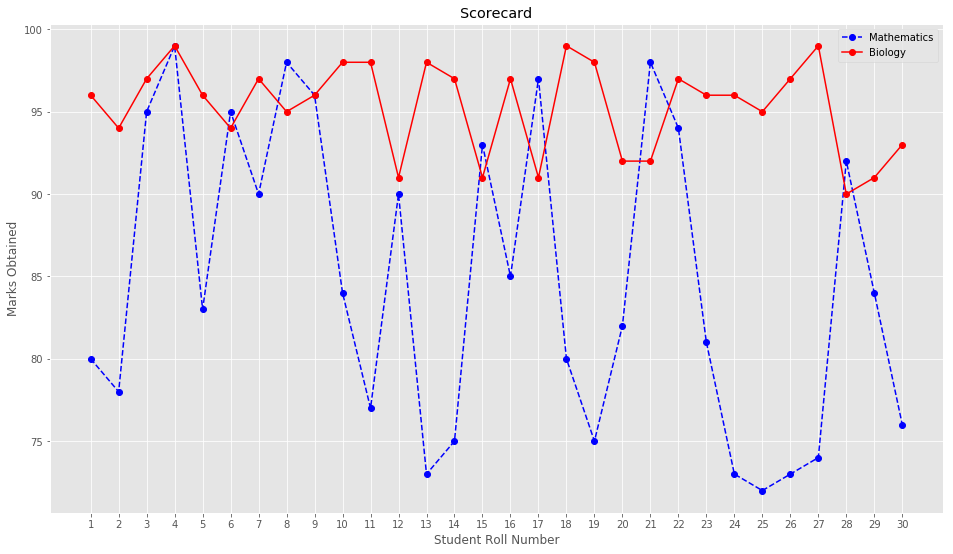

In [129]:
plt.plot(df_students.Mathematics.tolist(), 'bo--', label="Mathematics")
plt.plot(df_students.Biology.tolist(), 'ro-', label="Biology")
plt.xticks(range(student_count), df_students.index.tolist())
plt.xlabel("Student Roll Number")
plt.ylabel("Marks Obtained")
plt.title("Scorecard")
plt.legend(loc='upper right')
plt.show()

# Reading data from CSV files

In [198]:
df_sales = pd.read_csv("data/sales.csv", parse_dates=['date'])

In [133]:
df_sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


# Creating subset of the data

## 1. Getting subset of columns

In [179]:
df_subset = df_sales[["name", "category", "quantity", "unit price"]]
print df_subset.shape
df_subset.head()

(1000, 4)


,name,category,quantity,unit price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64


In [241]:
print df_sales.columns[2:7]

Index([u'sku', u'category', u'quantity', u'unit price', u'ext price'], dtype='object')


In [180]:
df_subset = df_sales[df_sales.columns[1:6]]
print df_subset.shape
df_subset.head()

(1000, 5)


,name,sku,category,quantity,unit price
0,Carroll PLC,QN-82852,Belt,13,44.48
1,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16
3,Waters-Walker,AS-93055,Shirt,5,82.68
4,Waelchi-Fahey,AS-93055,Shirt,18,99.64


## 2. Getting subset of rows

In [242]:
df_subset = df_sales.iloc[10:50, :]
print df_subset.shape
df_subset.head()

(40, 8)


,account number,name,sku,category,quantity,unit price,ext price,date
10,995267,Cole-Eichmann,KV-99194,Shirt,19,60.22,1144.18,2014-03-10 06:23:31
11,524021,Hegmann and Sons,QN-82852,Belt,6,13.12,78.72,2013-11-03 18:38:16
12,758133,"Kihn, McClure and Denesik",LL-46261,Shoes,4,59.69,238.76,2014-01-11 21:48:28
13,555594,"Ernser, Cruickshank and Lind",FK-71853,Shirt,12,97.25,1167.00,2014-09-19 13:20:00
14,201259,Koelpin PLC,GS-86623,Shoes,9,81.44,732.96,2014-08-12 08:05:27


## 3. Subset based on rows and columns together

In [243]:
df_subset = df_sales[["name", "category", "quantity", "unit price"]][10:30]
print df_subset.shape
df_subset.head()

(20, 4)


,name,category,quantity,unit price
10,Cole-Eichmann,Shirt,19,60.22
11,Hegmann and Sons,Belt,6,13.12
12,"Kihn, McClure and Denesik",Shoes,4,59.69
13,"Ernser, Cruickshank and Lind",Shirt,12,97.25
14,Koelpin PLC,Shoes,9,81.44


In [183]:
df_subset = df_sales.iloc[10:30, [1,4,5,6,7]]
print df_subset.shape
df_subset.head()

(20, 5)


,name,quantity,unit price,ext price,date
10,Cole-Eichmann,19,60.22,1144.18,2014-03-10 06:23:31
11,Hegmann and Sons,6,13.12,78.72,2013-11-03 18:38:16
12,"Kihn, McClure and Denesik",4,59.69,238.76,2014-01-11 21:48:28
13,"Ernser, Cruickshank and Lind",12,97.25,1167.00,2014-09-19 13:20:00
14,Koelpin PLC,9,81.44,732.96,2014-08-12 08:05:27


## 4. Subset based on conditions

In [244]:
df_subset = df_sales[df_sales.quantity > 15]
print df_subset.shape
df_subset.head()

(232, 8)


,account number,name,sku,category,quantity,unit price,ext price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:05
6,995267,Cole-Eichmann,GS-86623,Shoes,18,15.28,275.04,2014-04-09 16:15:03
8,929400,"Senger, Upton and Breitenberg",LW-86841,Shoes,17,38.19,649.23,2014-02-10 05:55:56


In [246]:
bool_indexes = [True if x % 2 == 0 else False for x in range(df_sales.shape[0]) ]

In [250]:
# df_sales[bool_indexes]

In [178]:
df_subset = df_sales[df_sales.name.str.len() > 20]
print df_subset.shape
df_subset.head()

(357, 8)


,account number,name,sku,category,quantity,unit price,ext price,date
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:05
8,929400,"Senger, Upton and Breitenberg",LW-86841,Shoes,17,38.19,649.23,2014-02-10 05:55:56
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:28
12,758133,"Kihn, McClure and Denesik",LL-46261,Shoes,4,59.69,238.76,2014-01-11 21:48:28


In [190]:
df_subset = df_sales[(df_sales.quantity > 15) & (df_sales["unit price"] > 50)]
print df_subset.shape
df_subset.head()

(138, 8)


,account number,name,sku,category,quantity,unit price,ext price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:05
10,995267,Cole-Eichmann,KV-99194,Shirt,19,60.22,1144.18,2014-03-10 06:23:31
15,93356,Waters-Walker,LL-46261,Shoes,18,53.33,959.94,2014-07-15 23:21:11


# Sorting rows by columns

In [196]:
df_subset = df_sales.sort_values('quantity', ascending=False)
df_subset.head()

,account number,name,sku,category,quantity,unit price,ext price,date
556,304860,Huel-Haag,GS-86623,Shoes,20,71.91,1438.2,2014-02-14 02:11:56
598,995267,Cole-Eichmann,VG-32047,Shirt,20,28.81,576.2,2014-03-19 16:59:03
91,563905,"Kerluke, Reilly and Bechtelar",VG-32047,Shirt,20,28.61,572.2,2014-09-30 19:16:05
802,929400,"Senger, Upton and Breitenberg",WJ-02096,Belt,20,51.16,1023.2,2013-10-31 15:48:14
816,995267,Cole-Eichmann,MJ-21460,Shoes,20,25.66,513.2,2014-03-24 03:39:51


In [197]:
df_subset = df_sales.sort_values(['quantity', 'unit price'], ascending=False)
df_subset.head()

,account number,name,sku,category,quantity,unit price,ext price,date
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.8,2014-04-18 15:39:12
182,524021,Hegmann and Sons,AS-93055,Shirt,20,96.98,1939.6,2014-06-13 18:23:55
918,995267,Cole-Eichmann,AS-93055,Shirt,20,96.14,1922.8,2014-08-02 19:08:15
214,758133,"Kihn, McClure and Denesik",VG-32047,Shirt,20,95.60,1912.0,2014-10-12 20:10:43
383,98022,Heidenreich-Bosco,VG-32047,Shirt,20,94.00,1880.0,2014-05-31 22:53:56


# Aggregate operations

In [201]:
df_sales_name_grp = df_sales.groupby(['name'])
df_sales_name_grp.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

In [225]:
df_total = df_sales_name_grp.sum()
df_total = df_total[["quantity", "ext price"]]
# df_total = df_total.sort_values("ext price", ascending=False)
df_total.head()

,quantity,ext price
name,,
Berge LLC,522,30064.87
Carroll PLC,677,35934.31
Cole-Eichmann,538,30435.42
"Davis, Kshlerin and Reilly",379,19054.76
"Ernser, Cruickshank and Lind",455,28089.02


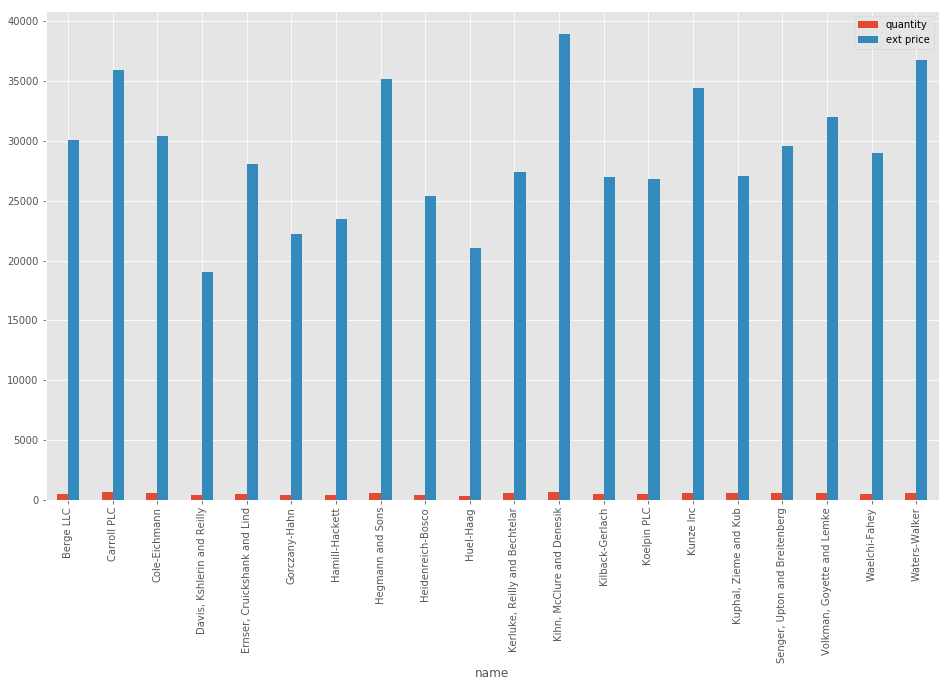

In [255]:
bar_plot = df_total.plot(kind='bar')
plt.show()

In [230]:
df_total_normalized = (df_total - df_total.min()) / (df_total.max() - df_total.min())

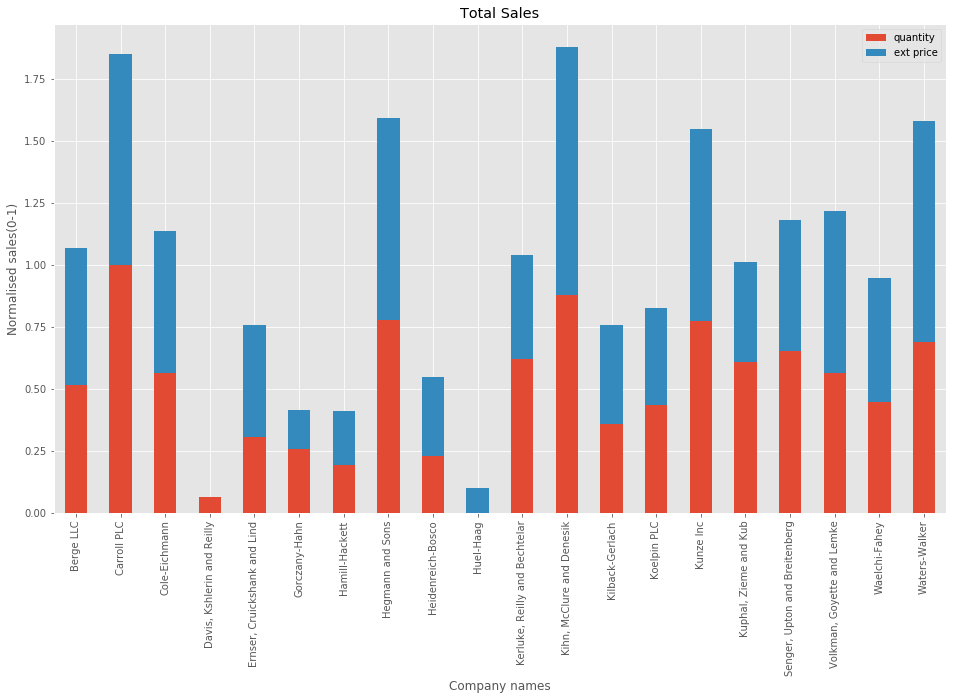

In [254]:
bar_plot = df_total_normalized.plot(kind='bar', stacked = True, title = "Total Sales")
bar_plot.set_xlabel("Company names")
bar_plot.set_ylabel("Normalised sales(0-1)")
plt.show()

In [174]:
df_sales.name.unique()

array(['Carroll PLC', 'Heidenreich-Bosco', 'Kerluke, Reilly and Bechtelar',
       'Waters-Walker', 'Waelchi-Fahey', 'Cole-Eichmann',
       'Hegmann and Sons', 'Senger, Upton and Breitenberg',
       'Kihn, McClure and Denesik', 'Ernser, Cruickshank and Lind',
       'Koelpin PLC', 'Volkman, Goyette and Lemke', 'Berge LLC',
       'Huel-Haag', 'Kunze Inc', 'Gorczany-Hahn', 'Kilback-Gerlach',
       'Hamill-Hackett', 'Davis, Kshlerin and Reilly',
       'Kuphal, Zieme and Kub'], dtype=object)

In [121]:
df_sales.shape

(1000, 8)

In [122]:
df_sales.groupby(['name']).sum()

,account number,quantity,unit price,ext price
name,,,,
Berge LLC,38215944,522,3076.92,30064.87
Carroll PLC,16918113,677,2947.25,35934.31
Cole-Eichmann,50758617,538,2833.00,30435.42
"Davis, Kshlerin and Reilly",12537923,379,2138.16,19054.76
"Ernser, Cruickshank and Lind",26112918,455,2854.91,28089.02
Gorczany-Hahn,4835796,440,2225.71,22207.90
Hamill-Hackett,29781268,419,2582.64,23433.78
Hegmann and Sons,30393218,606,3413.61,35213.72
Heidenreich-Bosco,3920880,431,2322.30,25428.29


In [24]:
df_us_exports = pd.read_csv('data/us_ag_exports.csv')

In [25]:
df_us_exports = df_us_exports.dropna()

In [26]:
df_us_exports.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [27]:
df_us_exports.describe()

,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2728.889000,108.394000,122.282000,112.700000,95.725200,90.05000,191.736000,281.79000,44.428000,72.102000,116.523800,273.042000,222.824000,169.32500
std,3144.837608,193.762904,303.492907,162.878644,168.016886,402.16488,856.334256,1258.49891,116.513625,189.088833,305.615222,556.824919,362.291291,402.92782
min,13.310000,0.100000,0.000000,0.000000,0.190000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,465.142500,13.400000,0.525000,2.950000,6.980000,2.12500,4.550000,6.67000,4.325000,6.950000,11.232500,5.875000,8.500000,0.00000
50%,1822.950000,41.050000,16.800000,33.550000,32.165000,4.80000,10.300000,15.11000,12.500000,20.350000,32.910000,37.200000,78.100000,0.00000
75%,3768.665000,106.725000,84.975000,162.425000,101.535000,25.30000,53.925000,79.24000,45.700000,74.175000,119.845000,182.175000,248.725000,102.46500
max,16472.880000,961.000000,1895.600000,630.400000,929.950000,2791.80000,5944.600000,8736.40000,803.200000,1303.500000,2106.790000,2529.800000,1664.500000,2308.76000


[]

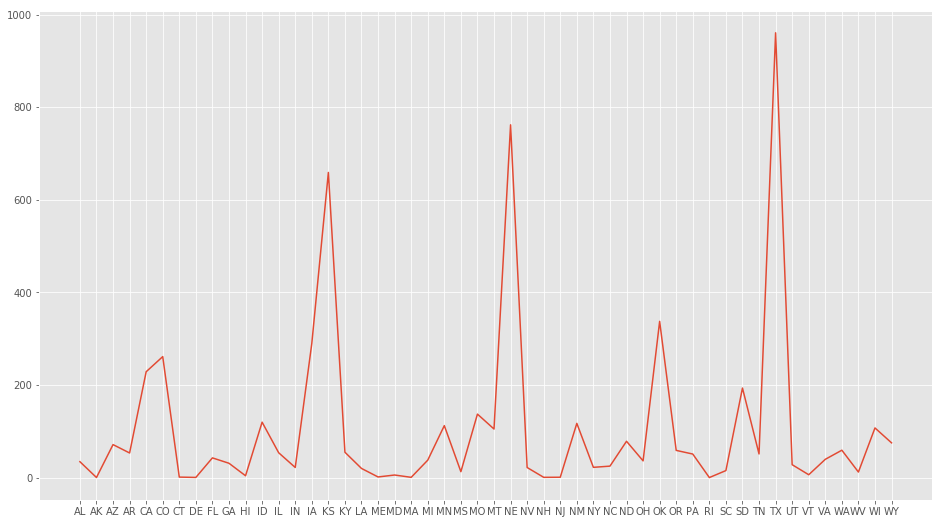

In [31]:
plt.plot(df_us_exports['beef'])
plt.xticks(range(df_us_exports.shape[0]), df_us_exports['code'].tolist())
plt.plot()

In [16]:
df_us_exports.set_index('code', inplace=True)

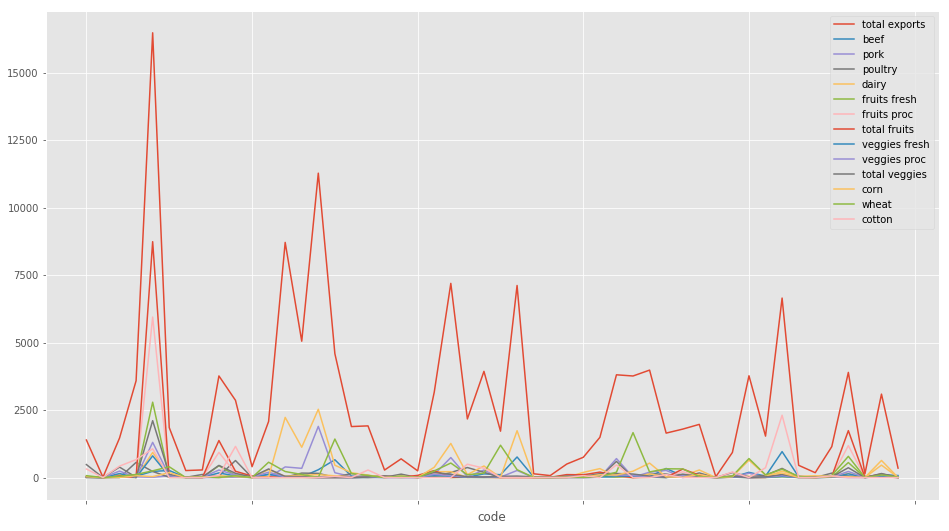

In [17]:
df_us_exports.plot()

In [18]:
df_us_exports.head()

,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
code,,,,,,,,,,,,,,,,
AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95
